In [148]:
%pylab inline
import pandas
import seaborn as sns
from scipy import interpolate

rcParams['figure.figsize'] = 10, 5
rcParams.update({'font.size': 12})


Populating the interactive namespace from numpy and matplotlib


/home/matthew/venv/kr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [88]:
# Read data
df = pandas.read_csv('results.csv')

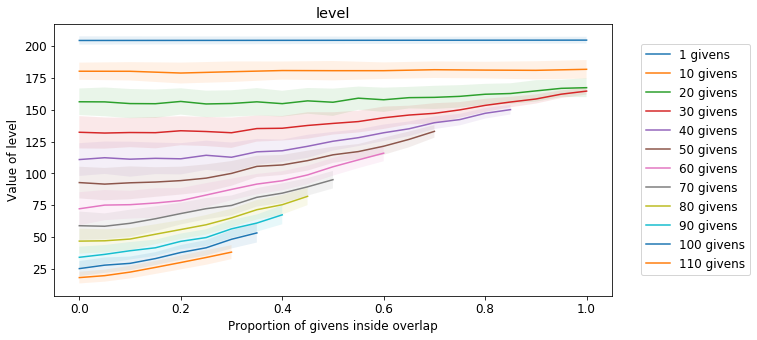

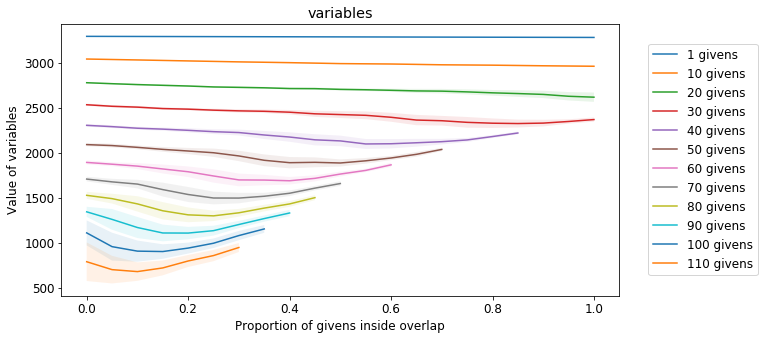

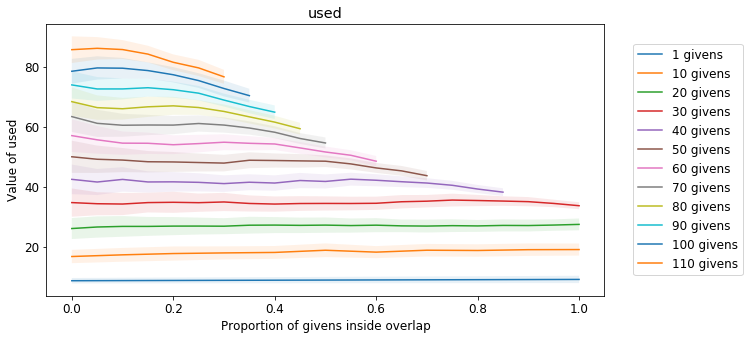

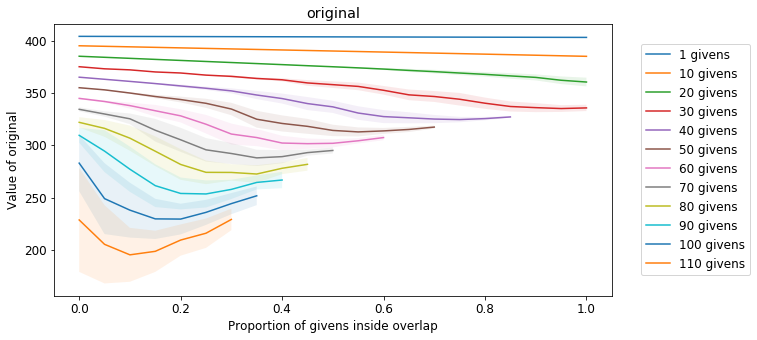

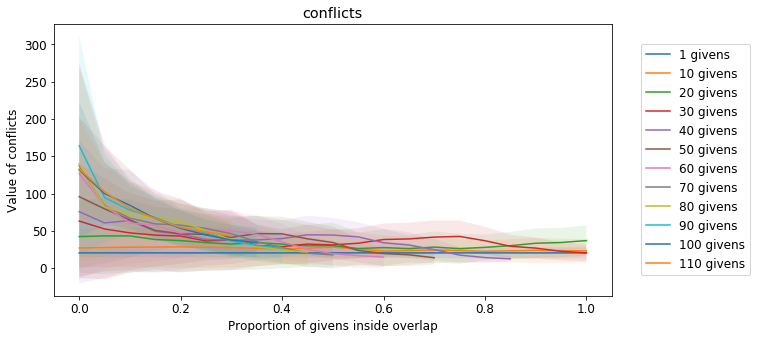

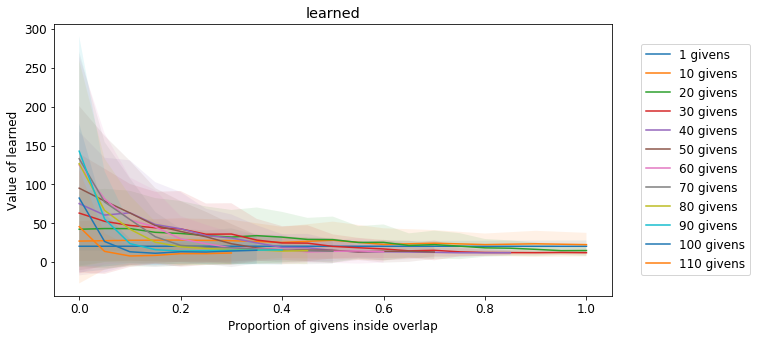

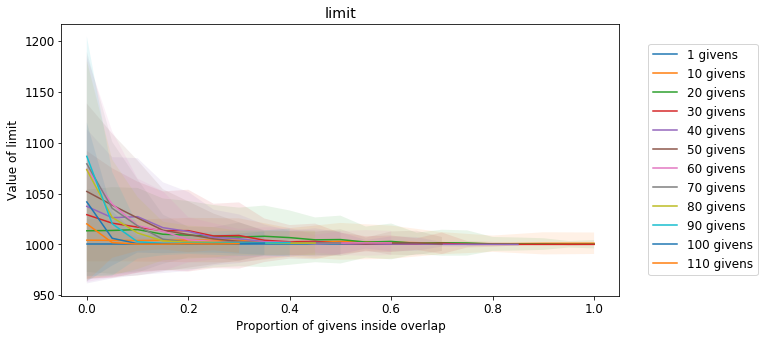

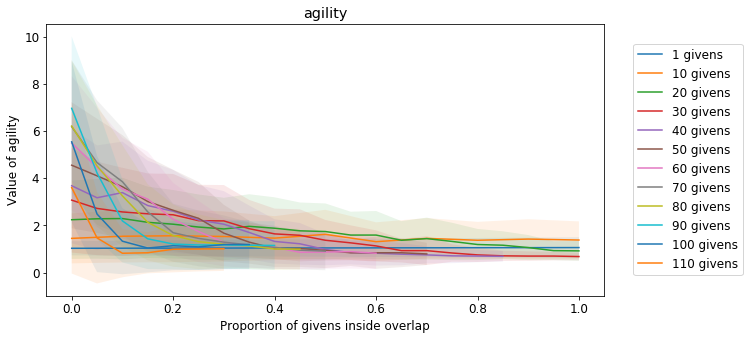

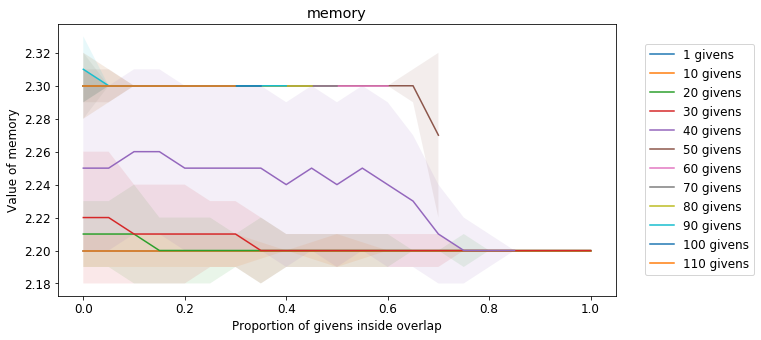

In [186]:
# Line plots
for stat in list(df)[4::2]:
    plt.title('{}'.format(stat))
    
    for givens in df['givens'].unique():
        props = []
        values = []
        deviations = []
        
        for i, line in df[df['givens'] == givens].iterrows():
            props.append(line['proportion'])
            values.append(line[stat])
            deviations.append(line['{}-dev'.format(stat)])
            
        plt.plot(props, values, label='{} givens'.format(givens))
        plt.fill_between(props, np.array(values)-np.array(deviations),
                         np.array(values)+np.array(deviations), alpha=0.1)
        
    plt.legend(loc=9, bbox_to_anchor=(1.15,0.95), ncol=1)
    plt.xlabel('Proportion of givens inside overlap')
    plt.ylabel('Value of {}'.format(stat)) 
    plt.show()

146


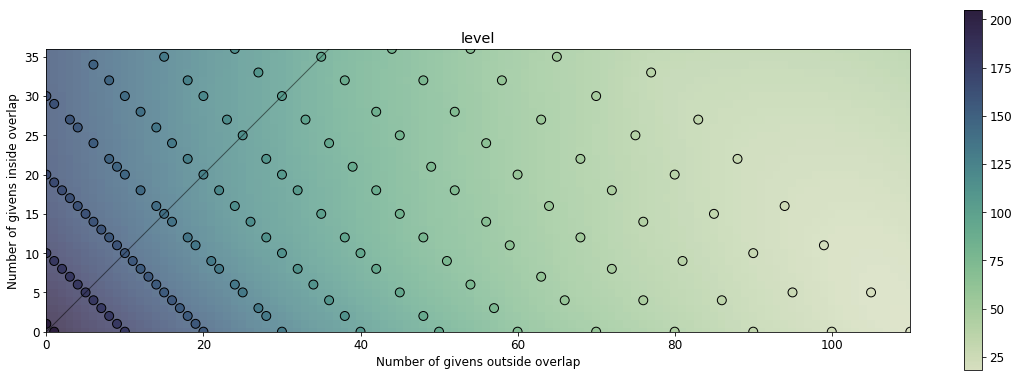

146


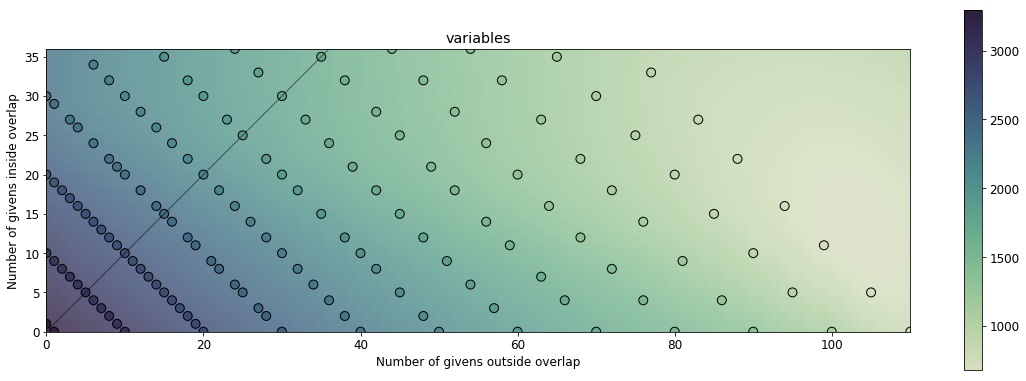

146


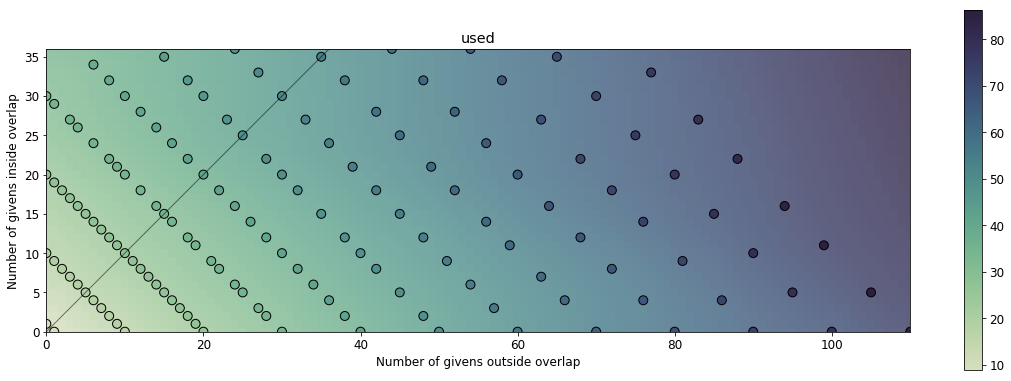

146


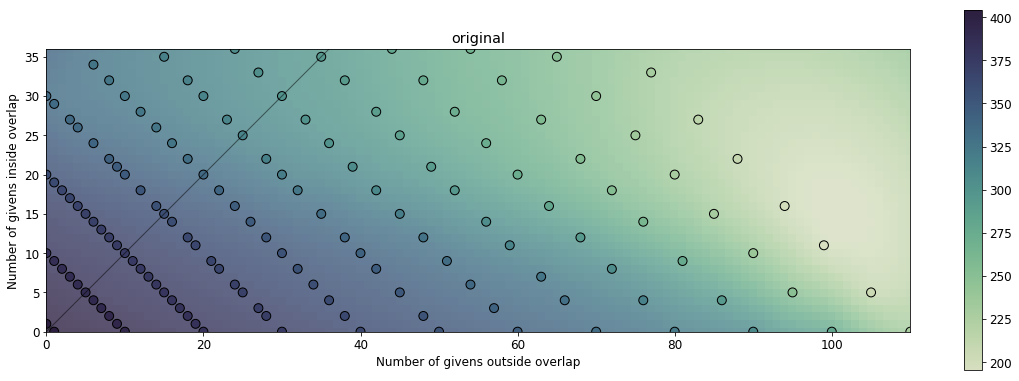

146


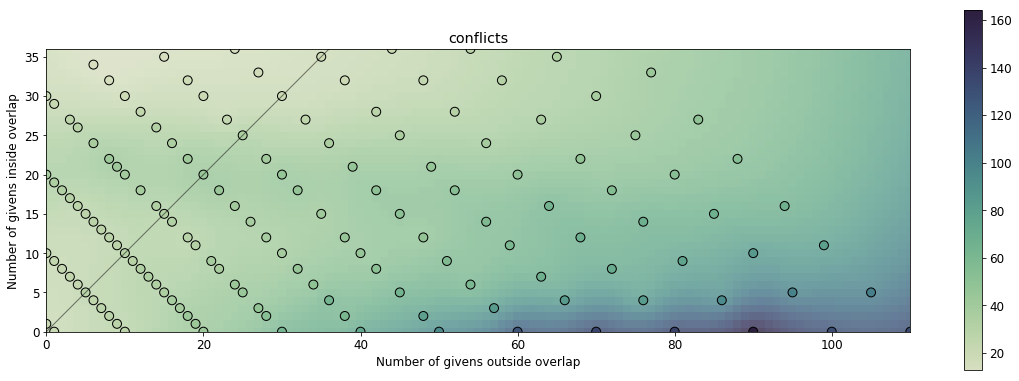

146


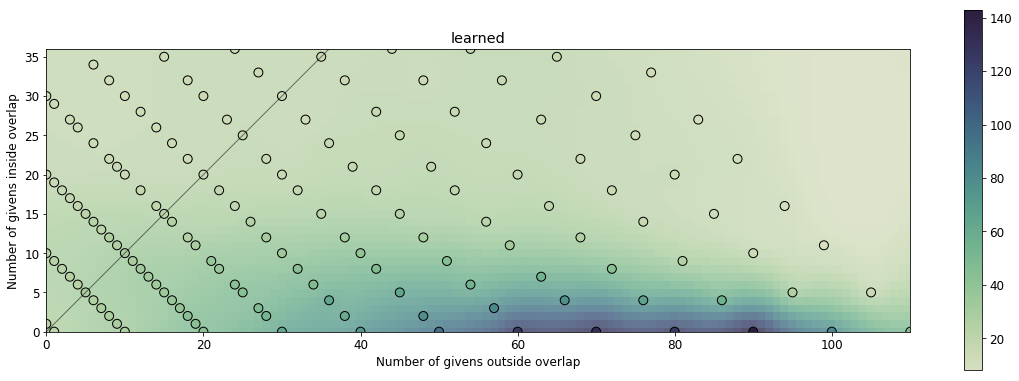

146


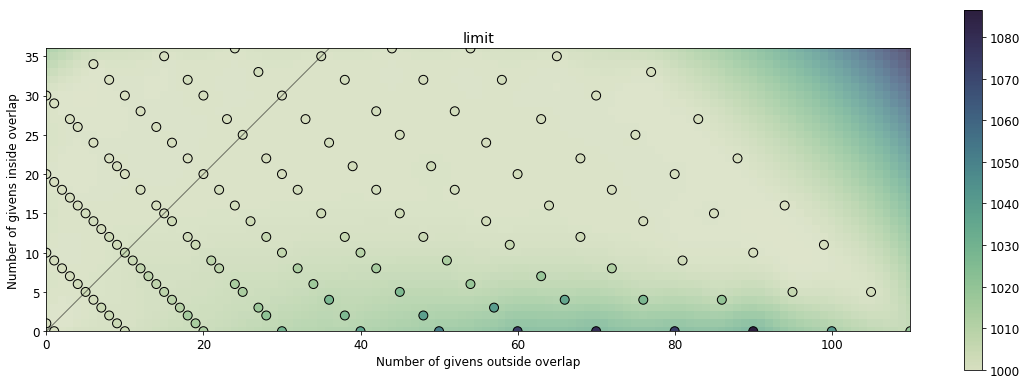

146


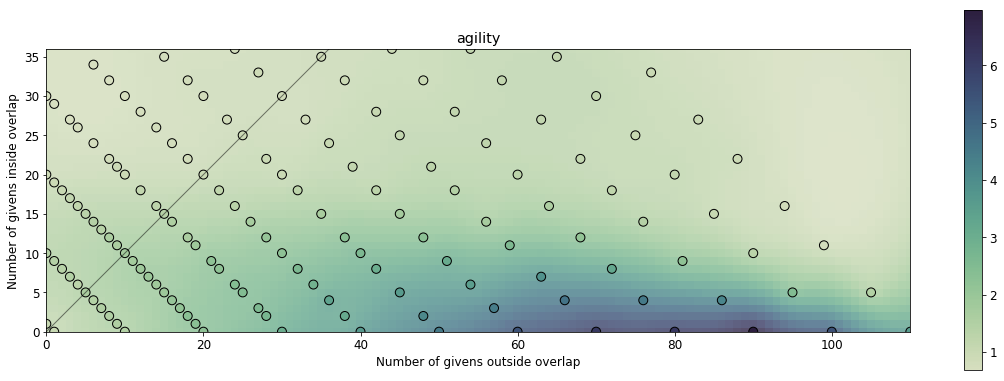

146


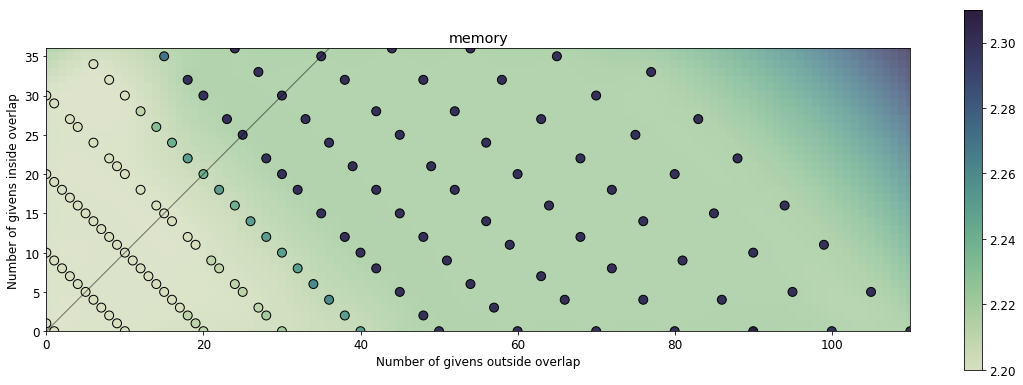

In [184]:
# Scatter plots
for stat in list(df)[4::2]:
    
    insides = []
    outsides = []
    values = []
    
    cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
    f, ax = plt.subplots(figsize=(15, 5))
    
    for i, line in df.iterrows():
        insides.append(line['inside'])
        outsides.append(line['outside'])
        values.append(line[stat])  
        
    # Interpolate
    rbfi = interpolate.Rbf(outsides, insides, values, function='linear', smooth=0)
    xv, yv = np.meshgrid(np.linspace(0, 111, 112), np.linspace(0, 37, 38))
    inte = rbfi(xv, yv)
    plt.imshow(inte, cmap=cmap, alpha=0.8, origin='lower')
 
    points = ax.scatter(outsides, insides, c=values, s=80, cmap=cmap, edgecolors='black')
    f.colorbar(points)

    x = np.linspace(0, 36, 36)
    plt.plot(x, x, c='black', linewidth=1, alpha=0.5)
        
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.xlabel('Number of givens outside overlap')
    plt.ylabel('Number of givens inside overlap') 
    plt.xlim(0, 110)
    plt.ylim(0, 36)
    plt.title('{}'.format(stat))
    plt.show()